<h1> <font face= 'Lucida Grande' size='6'> <Center> Chemical Classification Using Deep Learning Approach </h1> 

 - <font face= 'Lucida Grande' size='4.5'>  The given problem falls under the category of Binary Classification
<br> 1- Musk </br>
<br> 0- Non-Musk

<h2> <font face= 'Lucida Grande' size='5'> Importing Necessary Libraries

In [52]:
from pyforest import *

import pandas_profiling as pp

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import f_classif, mutual_info_classif

from sklearn.metrics import confusion_matrix, f1_score, classification_report

<h2> <font face= 'Lucida Grande' size='5'> Loading the data

In [2]:
data=pd.read_csv('musk_csv.csv')
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


<h2> <font face= 'Lucida Grande' size='5'> Doing Some Exploratory Data Analysis 

In [3]:
data.shape

(6598, 170)

In [4]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

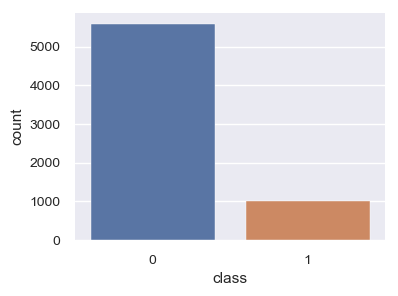

In [5]:
sns.set({'figure.figsize': (4,3)},  font_scale=2)
plt.figure(dpi=100)
sns.countplot(x='class', data=data)

<font face='Lucida Grande' size= '4'>  <a>
- Highly Imbalanced Data

<h2> <font face= 'Lucida Grande' size='5'> Missing Value Check

In [6]:
sum(data.isna().any())

0

<font face='Lucida Grande' size= '4'>  <a>
- No Missing or Null Values in the Data are Present

<h2> <font face= 'Lucida Grande' size='5'> Generating Pandas Profile Report

In [7]:
#output = pp.ProfileReport(data)
#output.to_file(output_file='pandas_profiling_report.html')
#output

<h3> <font face= 'Lucida Grande'>  Removing Highly correlated columns based on Pandas Profile Report

In [8]:
data.drop(['f104','f105','f11','f110','f111','f113', 'f114', 'f119', 'f128' , 'f139' , 'f14', 'f143' , 'f144', 'f149' , 'f15' , 
      'f152', 'f21' , 'f22' ,'f23' , 'f25','f26', 'f27', 'f30', 'f34', 'f35', 'f38', 'f40' , 'f41' , 'f44' , 'f45' , 
      'f46', 'f48', 'f52', 'f53', 'f57', 'f59', 'f60' , 'f64' ,'f65' ,'f7','f71','f72', 'f73','f74', 'f77' , 'f78' , 'f79' ,
      'f80' , 'f81' , 'f82', 'f83', 'f85' , 'f86' , 'f87' , 'f9' , 'f90' , 'f93' , 'f98', 'f99'], axis=1, inplace =True)

<h3> <font face= 'Lucida Grande' > Removing 'ID', 'conformation_name' and 'molecule_name'

In [9]:
data.drop([ 'ID', 'conformation_name' , 'molecule_name'], axis=1, inplace=True)

<h2> <font face= 'Lucida Grande' size='5'> Splitting Data into 80:20 Ratio

In [10]:
#Splitting the data
feature_columns = data.columns.difference( ['class'] )
train_X, test_X, train_y, test_y = train_test_split(data[feature_columns],
                                                  data['class'],
                                                  test_size=0.2,random_state=101)
                                                  
print (len( train_X ))
print (len (train_y))
print (len( test_X))
print (len( test_y))
print (data.shape)

5278
5278
1320
1320
(6598, 108)


<h1> <font face= 'Lucida Grande'> Feature Reduction:</h1>
<h3> <font face= 'Lucida Grande' >  Using RFE [Recursive feature engineering] to bucket out important features

In [11]:
import warnings
warnings.filterwarnings("ignore")  # To ignore Convergence Warnings otherwise it is going to take up a lot of space
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
rfe = RFE(logreg, 15)
rfe = rfe.fit(train_X, train_y )
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False False False False
 False False  True  True False False False False  True False False False
 False False False  True False False False False False False False False
 False False False False  True  True False  True  True False False False
 False False False False False False False  True False False False False
 False False False False False False False  True False False False False
 False False False  True False False False False False  True False False
 False False False False False False False  True False False False False
 False False False False False False False False  True False False]
[ 1 25  4 33 65 41 74 18 93 17 27 80 56 70  1  1 62 28 23 24  1 78 45 16
  7  8 46  1 79 19 37 38 54  5 82 75 66  3 91 81  1  1 21  1  1 32 10 44
 69 61 68 72 85 90 13  1 12 48 84  6 20 34 63 88 89 92 77  1 64 11 49 42
 47 51 59  1 26 29 35 83  9  1 57 76 40 43 71 67 50 86 14  1  2 52 53 87
 73 36 60 39 22 31 30 58  1 15 55]


In [12]:
# capturing the important variables
RFE_features=train_X.columns[rfe.get_support()]
RFE_features

Index(['f1', 'f118', 'f12', 'f124', 'f131', 'f147', 'f148', 'f151', 'f153',
       'f163', 'f3', 'f42', 'f51', 'f67', 'f95'],
      dtype='object')

<h3> <font face= 'Lucida Grande' > Using K Best Technique to find important Variables

In [13]:
X_new = SelectKBest(f_classif,k=25).fit(train_X, train_y )

In [14]:
# capturing the important variables
KBest_features=train_X.columns[X_new.get_support()]
KBest_features

Index(['f103', 'f106', 'f108', 'f109', 'f124', 'f125', 'f126', 'f132', 'f134',
       'f135', 'f148', 'f163', 'f19', 'f20', 'f31', 'f36', 'f37', 'f49', 'f54',
       'f66', 'f75', 'f8', 'f91', 'f92', 'f96'],
      dtype='object')

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


# <font face='Lucida Grande'> Building Artificial Neural Network Model

In [17]:
clf= Sequential([
  Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 107),
  Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
  Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')])

clf.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
history = clf.fit(train_X,train_y,batch_size=20,epochs=20,validation_data=(test_X,test_y))
score=clf.evaluate(test_X,test_y,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 1s 148us/step - loss: 0.0282 - acc: 0.9884 - val_loss: 0.0618 - val_acc: 0.9811
Epoch 2/20
5278/5278 [==============================] - 1s 138us/step - loss: 0.0266 - acc: 0.9905 - val_loss: 0.0710 - val_acc: 0.9795
Epoch 3/20
5278/5278 [==============================] - 1s 141us/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0671 - val_acc: 0.9833
Epoch 4/20
5278/5278 [==============================] - 1s 180us/step - loss: 0.0241 - acc: 0.9911 - val_loss: 0.0736 - val_acc: 0.9780
Epoch 5/20
5278/5278 [==============================] - 1s 137us/step - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0726 - val_acc: 0.9780
Epoch 6/20
5278/5278 [==============================] - 1s 139us/step - loss: 0.0206 - acc: 0.9930 - val_loss: 0.0714 - val_acc: 0.9788
Epoch 7/20
5278/5278 [==============================] - 1s 151us/step - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0728 - val_acc: 0.9795


## History Plot for accuracy

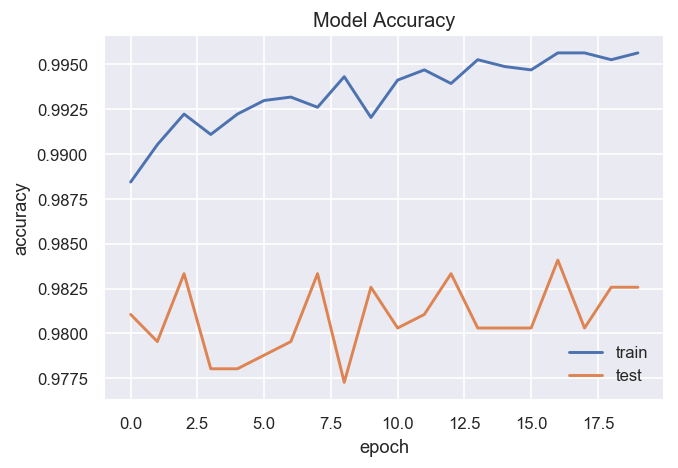

In [20]:
%matplotlib inline
plt.figure(dpi=120)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

## History Plot for loss

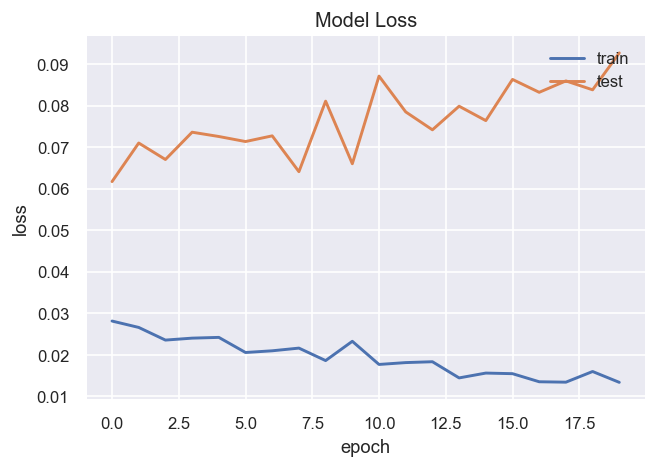

In [21]:
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# <font face='Lucida Grande'> Building Final Model on Important Features

In [22]:
KBest_features

Index(['f103', 'f106', 'f108', 'f109', 'f124', 'f125', 'f126', 'f132', 'f134',
       'f135', 'f148', 'f163', 'f19', 'f20', 'f31', 'f36', 'f37', 'f49', 'f54',
       'f66', 'f75', 'f8', 'f91', 'f92', 'f96'],
      dtype='object')

In [23]:
RFE_features

Index(['f1', 'f118', 'f12', 'f124', 'f131', 'f147', 'f148', 'f151', 'f153',
       'f163', 'f3', 'f42', 'f51', 'f67', 'f95'],
      dtype='object')

In [24]:
features=set(list(RFE_features)+list(KBest_features)+['class'])
print(features)

{'f134', 'f37', 'f148', 'f67', 'f91', 'f36', 'f109', 'f96', 'f66', 'f92', 'f42', 'f135', 'f108', 'f147', 'f51', 'f95', 'f20', 'f106', 'f49', 'f151', 'f163', 'f118', 'f31', 'f3', 'f103', 'f19', 'f1', 'f126', 'f8', 'f153', 'f131', 'f125', 'f124', 'f75', 'f12', 'class', 'f132', 'f54'}


In [25]:
data_new=data[features]

In [26]:
data_new.head()

,f134,f37,f148,f67,f91,f36,f109,f96,f66,f92,...,f8,f153,f131,f125,f124,f75,f12,class,f132,f54
0,-182,-165,-14,-166,-188,63,-205,-55,59,119,...,-161,-114,45,80,-107,-97,-220,1,-118,-131
1,-124,-171,-66,-166,-200,61,-244,-52,59,82,...,-171,-32,32,-10,-77,-255,-111,1,-128,-133
2,-125,-175,-66,-166,-202,71,-244,40,56,47,...,-168,-41,-15,-129,-36,-231,-111,1,-129,-131
3,-125,-171,-65,-166,-200,62,-244,-50,59,82,...,-170,-32,32,-12,-78,-255,-111,1,-128,-133
4,-125,-171,-65,-166,-200,62,-244,-50,59,82,...,-170,-32,32,-12,-78,-255,-111,1,-128,-133


## <font face='Lucida Grande'> Splitting the Data into 80:20 ratio 

In [27]:
#Splitting the data
feature_columns = data_new.columns.difference( ['class'] )
train_X, test_X, train_y, test_y = train_test_split(data_new[feature_columns],
                                                  data_new['class'],
                                                  test_size=0.2,random_state=101)
                                                  
print (len( train_X ))
print (len (train_y))
print (len( test_X))
print (len( test_y))
print (data_new.shape)

5278
5278
1320
1320
(6598, 38)


In [28]:
clf2= Sequential([
  Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 37),
  Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
  Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')])

clf2.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [29]:
history = clf2.fit(train_X,train_y,batch_size=20,epochs=20,validation_data=(test_X,test_y))
score=clf2.evaluate(test_X,test_y,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 2s 401us/step - loss: 0.2999 - acc: 0.8668 - val_loss: 0.2605 - val_acc: 0.8985
Epoch 2/20
5278/5278 [==============================] - 1s 145us/step - loss: 0.2301 - acc: 0.9144 - val_loss: 0.2199 - val_acc: 0.9076
Epoch 3/20
5278/5278 [==============================] - 1s 135us/step - loss: 0.1912 - acc: 0.9269 - val_loss: 0.1983 - val_acc: 0.9220
Epoch 4/20
5278/5278 [==============================] - 1s 133us/step - loss: 0.1757 - acc: 0.9318 - val_loss: 0.1844 - val_acc: 0.9235
Epoch 5/20
5278/5278 [==============================] - 1s 135us/step - loss: 0.1651 - acc: 0.9379 - val_loss: 0.1757 - val_acc: 0.9303
Epoch 6/20
5278/5278 [==============================] - 1s 144us/step - loss: 0.1590 - acc: 0.9365 - val_loss: 0.1697 - val_acc: 0.9333
Epoch 7/20
5278/5278 [==============================] - 1s 153us/step - loss: 0.1530 - acc: 0.9382 - val_loss: 0.1631 - val_acc: 0.9356


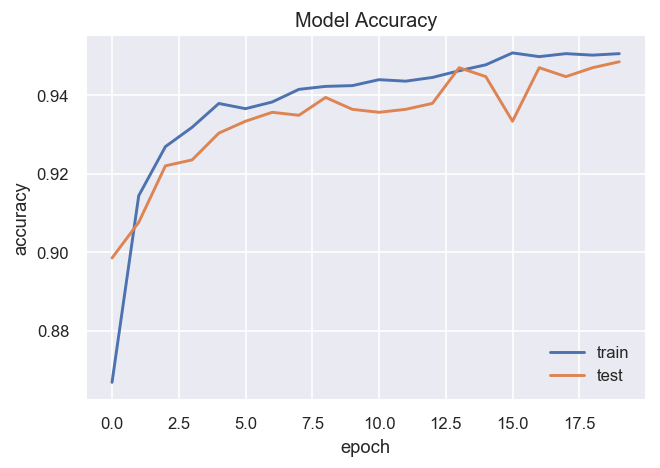

In [30]:
%matplotlib inline
plt.figure(dpi=120)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

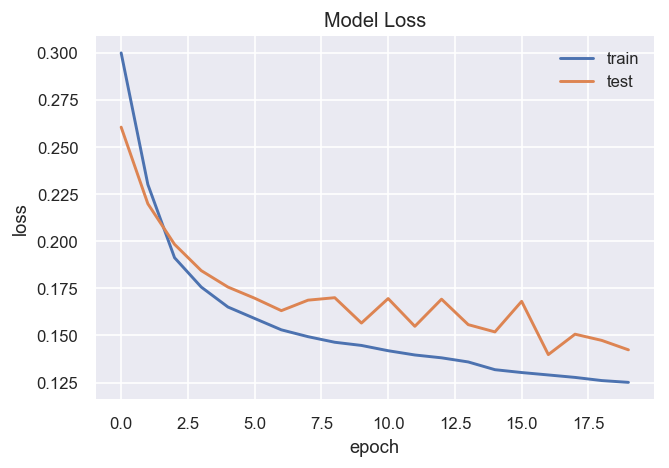

In [31]:
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# <font face='Lucida Grande'> Confusion Matrix and Classification report 

In [46]:
cm_train = confusion_matrix(train_y, clf2.predict_classes(train_X))
print(cm_train)

[[4380   86]
 [ 152  660]]


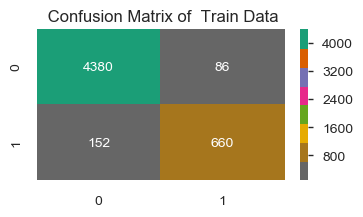

In [51]:
%matplotlib inline 
sns.set({'figure.figsize': (4,2)},font_scale=2)
plt.figure(dpi=100)
sns.heatmap(confusion_matrix(train_y, clf2.predict_classes(train_X)), cmap='Dark2_r', annot=True, fmt='.0f')
plt.title(' Confusion Matrix of  Train Data')
plt.show()

In [47]:
cm_test = confusion_matrix(test_y, clf2.predict_classes(test_X))
print(cm_test)

[[1093   22]
 [  46  159]]


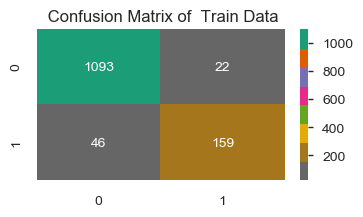

In [53]:
%matplotlib inline 
sns.set({'figure.figsize': (4,2)},font_scale=2)
plt.figure(dpi=100)
sns.heatmap(cm_test, cmap='Dark2_r', annot=True, fmt='.0f')
plt.title(' Confusion Matrix of  Train Data')
plt.show()

In [54]:
class_report_train=pd.DataFrame(classification_report(train_y, clf2.predict_classes(train_X), output_dict=True)).T

class_report_train

,f1-score,precision,recall,support
0,0.973550,0.966461,0.980743,4466.0
1,0.847240,0.884718,0.812808,812.0
micro avg,0.954907,0.954907,0.954907,5278.0
macro avg,0.910395,0.925590,0.896776,5278.0
weighted avg,0.954117,0.953885,0.954907,5278.0


In [55]:
class_report_test=pd.DataFrame(classification_report(test_y, clf2.predict_classes(test_X), output_dict=True)).T

class_report_test

,f1-score,precision,recall,support
0,0.969831,0.959614,0.980269,1115.0
1,0.823834,0.878453,0.775610,205.0
micro avg,0.948485,0.948485,0.948485,1320.0
macro avg,0.896833,0.919033,0.877939,1320.0
weighted avg,0.947158,0.947009,0.948485,1320.0


In [56]:
clf2.save('clf2.h5')